In [1]:
import numpy as np
from spec_id import Highest_likelihood_model_rfv,Analyze_Stack_avgage, Make_model_list,Stack_spec_normwmean_rfv,\
    Stack_model_normwmean_rfv, Stack_model_normwmean_in_mfit_rfv ,Scale_model,Identify_stack, Stack_spec_normwmean, Stack_model_normwmean
import matplotlib.pyplot as plt
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [3]:
ids,speclist,lmass,rshift,rad,sig,comp=np.array(Readfile('masslist_mar22.dat',is_float=False))
lmass,rshift,rad,sig,comp=np.array([lmass,rshift,rad,sig,comp]).astype(float)

gid, rfv, iracm =Readfile('galaxy_mags.dat', is_float=False)
rfv, iracm=np.array([rfv, iracm]).astype(float)

IDc=[]  # low mtor sample
IDd=[]  # high mtor sample

IDmL=[]  # low mass sample
IDmH=[]  # high mass sample

for i in range(len(ids)):
    if 0.11 < comp[i]:
        IDd.append(i)
    if 0.11 > comp[i]:
        IDc.append(i)    
    if 10.931 > lmass[i]:
        IDmL.append(i)
    if 10.931 < lmass[i]:
        IDmH.append(i)

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

print len(IDc)
print len(IDd)

print len(IDmH)
print len(IDmL)

10
15
6
19


spec_stacks_jan24/n16758_stack.npy


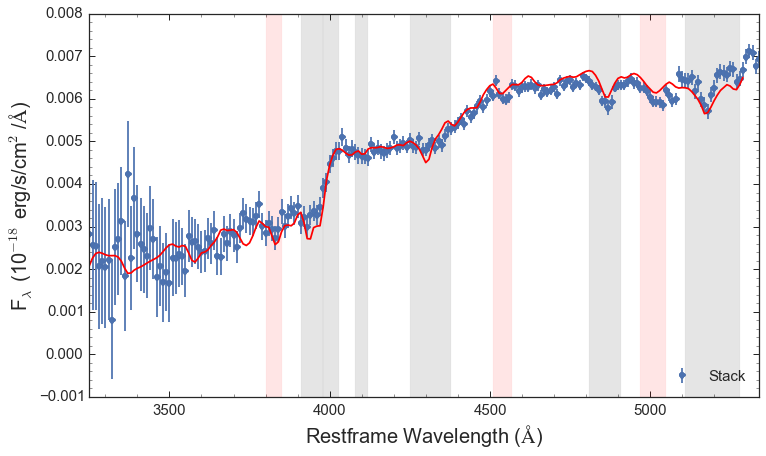

spec_stacks_jan24/n21156_stack.npy


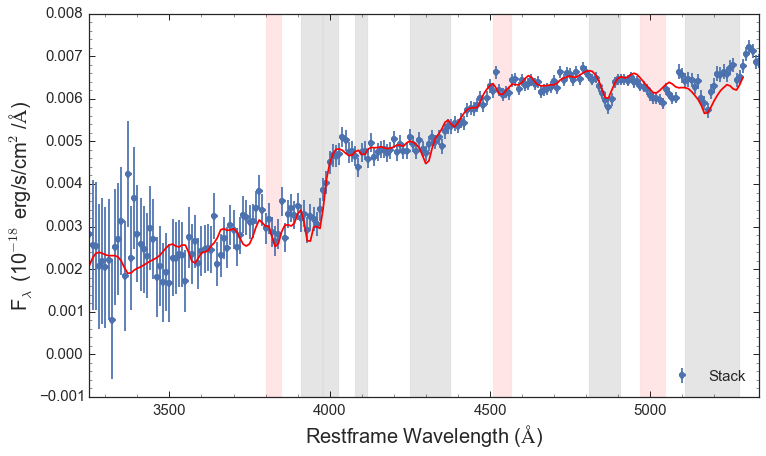

spec_stacks_jan24/n37686_stack.npy


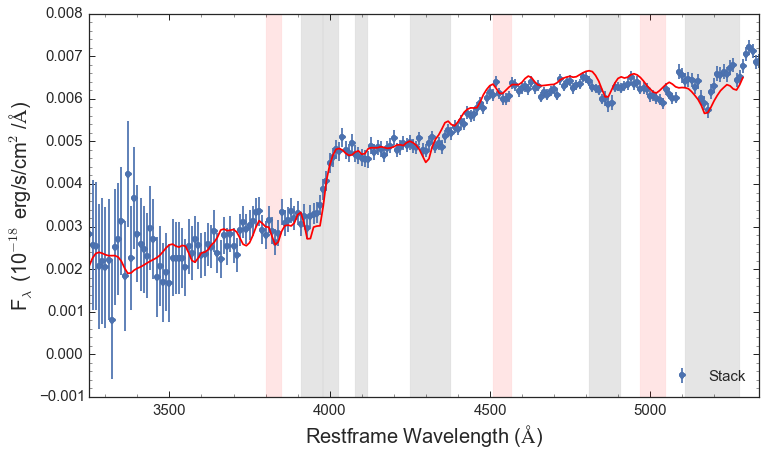

spec_stacks_jan24/s39012_stack.npy


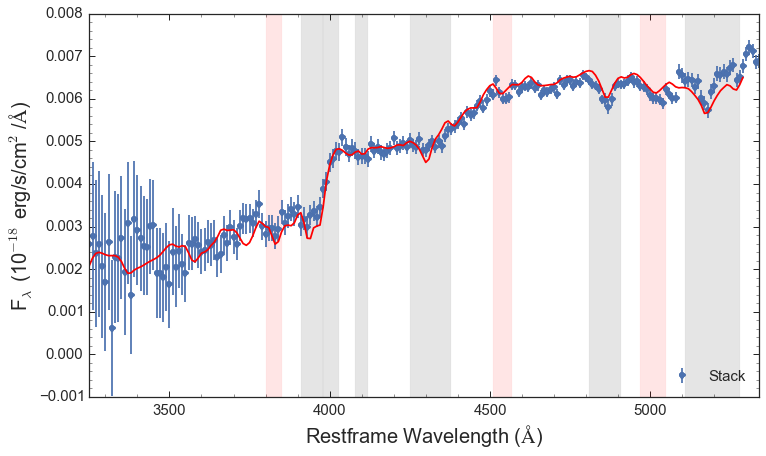

spec_stacks_jan24/s39170_stack.npy


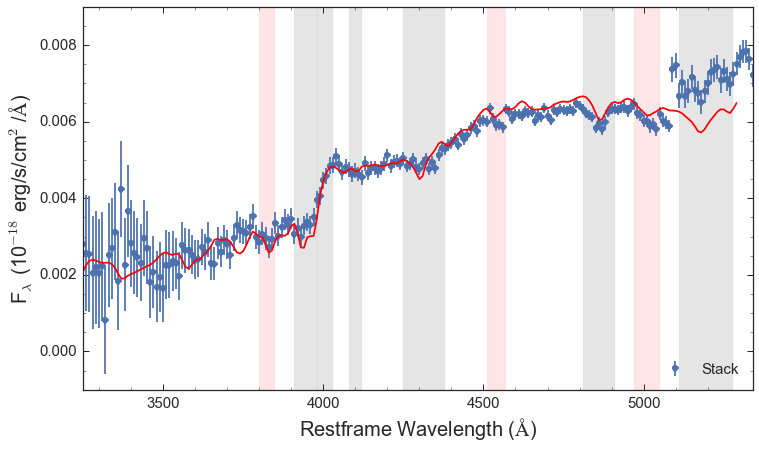

spec_stacks_jan24/s39241_stack.npy


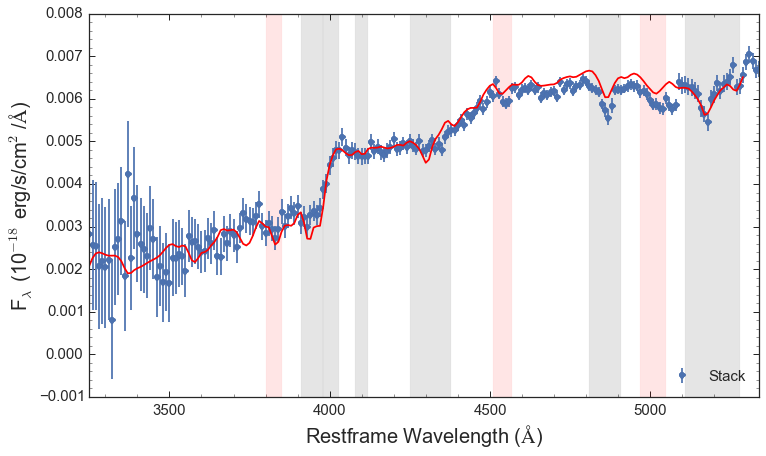

spec_stacks_jan24/s39804_stack.npy


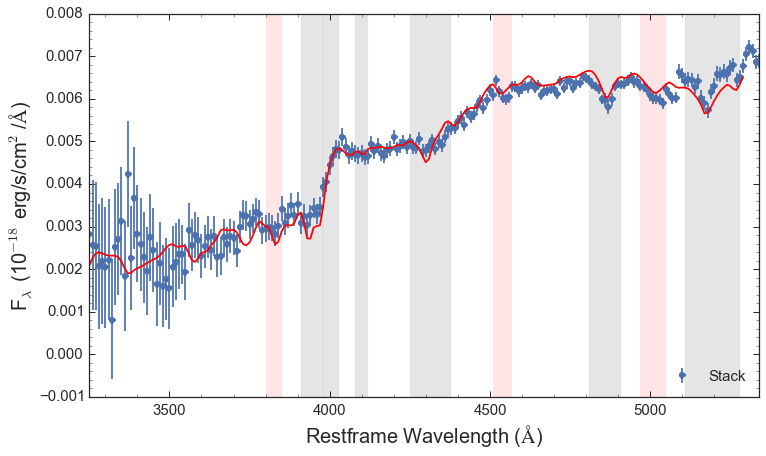

spec_stacks_jan24/s40597_stack.npy


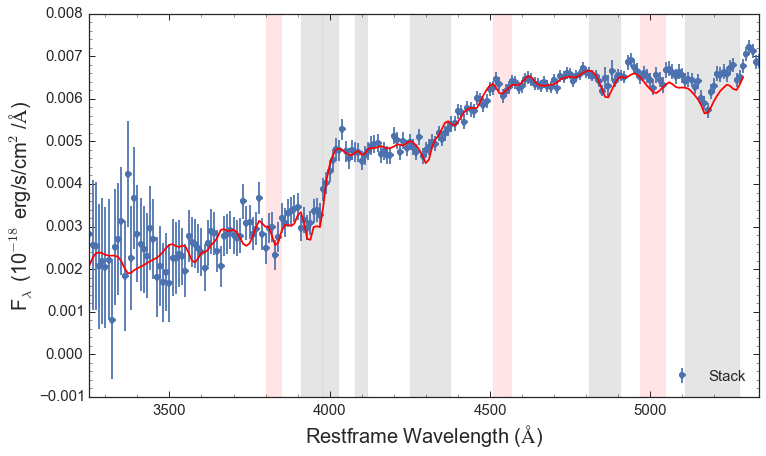

spec_stacks_jan24/s41520_stack.npy


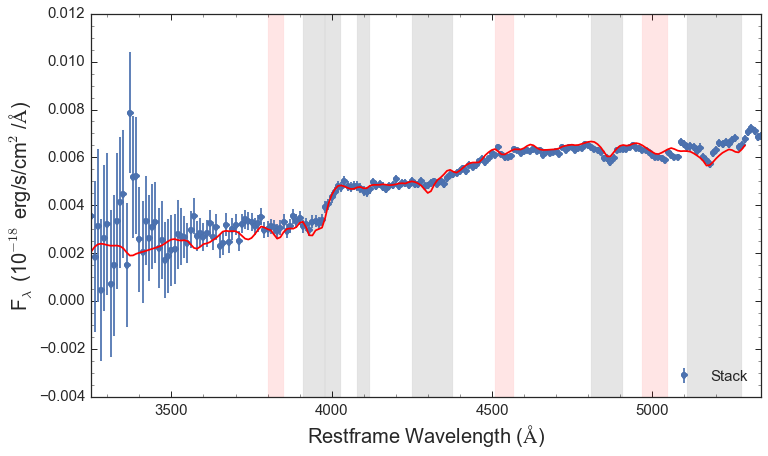

spec_stacks_jan24/s46066_stack.npy


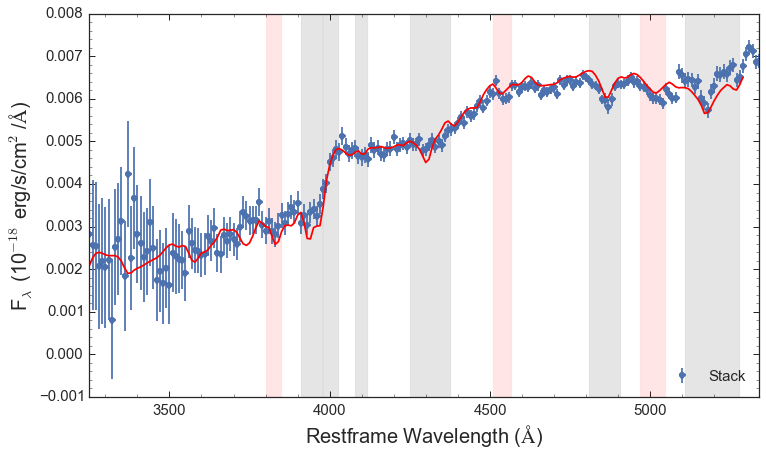

In [4]:
%matplotlib inline

for i in range(len(IDc)):
    IDx=[]
    for ii in range(len(IDc)):
        if IDc[ii] != IDc[i]:
            IDx.append(IDc[ii])
            
    print speclist[IDc][i]
    wv,fl,er=Stack_spec_normwmean(speclist[IDx],rshift[IDx],np.arange(3250,5350,10))
    mlist=Make_model_list(ids[IDx], 0.014, 3.6, 0, rshift[IDx])
    mwv,mfl=Stack_model_normwmean(speclist[IDx],mlist,rshift[IDx],np.arange(3250,5300,10))
    
    plt.figure(figsize=[12,8])
    plt.errorbar(wv,fl,er,fmt='o',label='Stack')
    plt.plot(mwv,mfl,'r')
    plt.axvspan(3800, 3850, color='r', alpha=.1)
    plt.axvspan(3910, 3980, color='k', alpha=.1)
    plt.axvspan(3980, 4030, color='k', alpha=.1)
    plt.axvspan(4080, 4120, color='k', alpha=.1)
    plt.axvspan(4250, 4380, color='k', alpha=.1)
    plt.axvspan(4510, 4570, color='r', alpha=.1)
    plt.axvspan(4810, 4910, color='k', alpha=.1)
    plt.axvspan(4970, 5050, color='r', alpha=.1)
    plt.axvspan(5110, 5280, color='k', alpha=.1)
    plt.xlim(min(wv),max(wv))
    plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\AA$)',size=20)
    plt.xlabel('Restframe Wavelength ($\AA$)',size=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.gcf().subplots_adjust(bottom=0.235)
    plt.legend(loc=4,fontsize=15)
    plt.minorticks_on()
    plt.show()
    plt.close()

In [8]:
goods_s=Table.read('/Users/Vince.ec/Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat',format='ascii')
goods_n=Table.read('/Users/Vince.ec/Clear_data/goodsn_mosaic/goodsn_3dhstP.cat',format='ascii')

In [ ]:
# restc_s=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/RF_colors/goodss_3dhst.v4.1.master.RF',format='ascii')
# restc_n=Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/RF_colors/goodsn_3dhst.v4.1.master.RF',format='ascii')

restc_s=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/RF_colors/goodss_3dhst.v4.1.master.RF',format='ascii')
restc_n=Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/RF_colors/goodsn_3dhst.v4.1.master.RF',format='ascii')

In [12]:
# f_IRAC1
# L155
def Mag(band):
    magnitude = 25 - 2.5 * np.log10(band)
    return magnitude

vrest=np.zeros(len(ids))
irac_mag=np.zeros(len(ids))

for i in range(len(ids)):
    if ids[i][0] == 's': 
        irac_mag[i] =  goods_s['f_IRAC1'][int(ids[i][1:])-1]
        vrest[i] =  restc_s['L155'][int(ids[i][1:])-1]
    if ids[i][0] == 'n': 
        irac_mag[i] =  goods_n['f_IRAC1'][int(ids[i][1:])-1]
        vrest[i] =  restc_n['L155'][int(ids[i][1:])-1]
        
irac_mag=Mag(irac_mag)

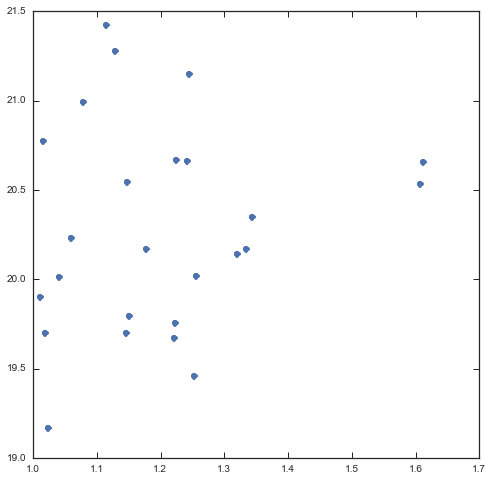

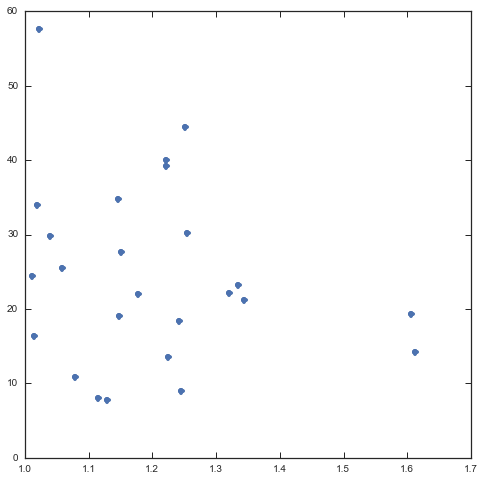

In [22]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.plot(rshift,irac_mag,'o')
plt.show()
plt.close()

plt.figure(figsize=[8,8])
plt.plot(rshift,vrest,'o')
plt.show()
plt.close()

# color_dat=Table([ids,vrest,irac_mag],names=['ids','RF_v','IRAC_mag'])
# ascii.write(color_dat,'galaxy_mags.dat')

In [49]:
def Stack_spec_normwmean_rfv(spec, redshifts, RF_v, wv):
    
    RFV=max(RF_v)/RF_v

    flgrid = np.zeros([len(spec), len(wv)])
    errgrid = np.zeros([len(spec), len(wv)])
    for i in range(len(spec)):
        wave, flux, error = np.load(spec[i])
        
        wave, flux, error = np.array([wave[wave<=11100], flux[wave<=11100], error[wave<=11100]])

        if spec[i] == 'spec_stacks_jan24/n21156_stack.npy':
            IDer = []
            for ii in range(len(wave)):
                if 4855 * (1 + redshifts[i]) <= wave[ii] <= 4880 * (1 + redshifts[i]):
                    IDer.append(ii)
            error[IDer] = 1E8
            flux[IDer] = 0


        if spec[i] == 'spec_stacks_jan24/s39170_stack.npy':
            IDer = []
            for ii in range(len(wave)):
                if 4860 * (1 + redshifts[i]) <= wave[ii] <= 4880 * (1 + redshifts[i]):
                    IDer.append(ii)
            error[IDer] = 1E8
            flux[IDer] = 0
            
        if spec[i] == 'spec_stacks_jan24/n34694_stack.npy':
            IDer = []
            for ii in range(len(wave)):
                if 4860 * (1 + redshifts[i]) <= wave[ii] <= 4880 * (1 + redshifts[i]):
                    IDer.append(ii)
            error[IDer] = 1E8
            flux[IDer] = 0
            
        wave /= (1 + redshifts[i])
        flux *= RFV[i]
        error *= RFV[i]
        mask = np.array([wave[0] < U < wave[-1] for U in wv])
        ifl = interp1d(wave, flux)
        ier = interp1d(wave, error)
        flgrid[i][mask] = ifl(wv[mask])
        errgrid[i][mask] = ier(wv[mask])
    ################

    flgrid = np.transpose(flgrid)
    errgrid = np.transpose(errgrid)
    weigrid = errgrid ** (-2)
    infmask = np.isinf(weigrid)
    weigrid[infmask] = 0
    ################

    stack, err = np.zeros([2, len(wv)])
    for i in range(len(wv)):
        stack[i] = np.sum(flgrid[i] * weigrid[[i]]) / np.sum(weigrid[i])
        err[i] = 1 / np.sqrt(np.sum(weigrid[i]))
    ################
    ###take out nans

    IDX = [U for U in range(len(wv)) if stack[U] > 0]

    return wv[IDX], stack[IDX], err[IDX]

In [52]:
def Stack_model_normwmean_rfv(speclist, modellist, redshifts, RF_v,wv_range):
    RFV=max(RF_v)/RF_v
    
    flgrid ,errgrid= [[],[]]

    for i in range(len(speclist)):
        #######read in spectra
        wave, flux, error = np.load(speclist[i])
        wave, flux, error = np.array([wave[wave<=11100], flux[wave<=11100], error[wave<=11100]])

        wave = wave / (1 + redshifts[i])
        flux *= RFV[i]
        error *= RFV[i]

        #######read in corresponding model, and interpolate flux
        W, F,= np.load(modellist[i])
        ifl = interp1d(W/ (1 + redshifts[i]), F)
        ier = interp1d(wave, error)

        #######scale the model
        C = Scale_model(flux, error, ifl(wave))

        ########interpolate spectra
        flentry,errentry = np.zeros([2,len(wv_range)])
        mask = np.array([wave[0] < U < wave[-1] for U in wv_range])
        flentry[mask] = ifl(wv_range[mask]) * C
        errentry[mask] = ier(wv_range[mask])
        flgrid.append(flentry)
        errgrid.append(errentry)

    weigrid = np.array(errgrid).T ** (-2)
    infmask = np.isinf(weigrid)
    weigrid[infmask] = 0
    ################

    stack = np.sum(np.array(flgrid).T * weigrid, axis=1) / np.sum(weigrid,axis=1)

    return wv_range, stack

937.822673751
500.340207343


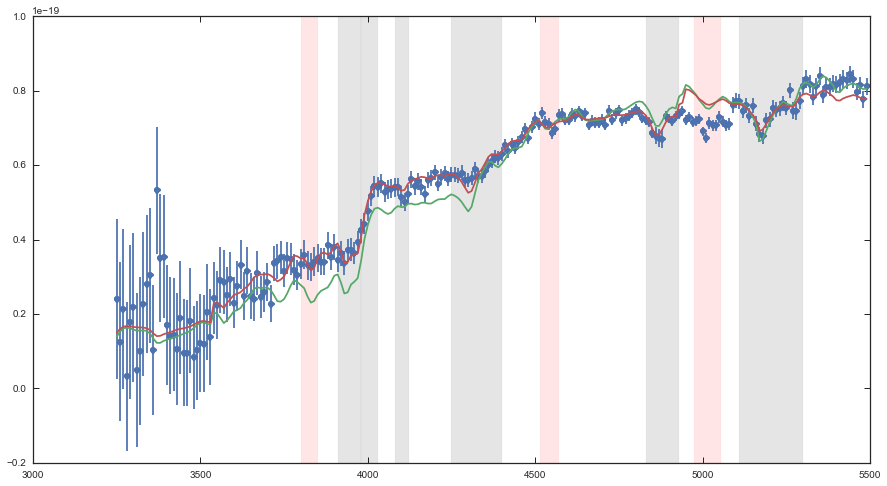

In [79]:
%matplotlib inline

# wv,fl,er=Stack_spec_normwmean(speclist[IDc],rshift[IDc],np.arange(3250,5350,10))
mlist=Make_model_list(ids[IDmH], 0.02, 4.7,0,rshift[IDmH])
mlist2=Make_model_list(ids[IDmH], 0.005, 6.0,8.9,rshift[IDmH])
# mwv,mfl=Stack_model_normwmean(speclist[IDc],mlist,rshift[IDc],np.arange(3250,5350,10))

wv2,fl2,er2=Stack_spec_normwmean_rfv(speclist[IDmH],rshift[IDmH],vrest[IDmH],np.arange(3250,5500,10))
# wv3,fl3,er3=Stack_spec_normwmean_rfv(speclist[IDd],rshift[IDd],vrest[IDd],np.arange(3450,5500,10))
mwv1,mfl1=Stack_model_normwmean_rfv(speclist[IDmH],mlist,rshift[IDmH],vrest[IDmH],np.arange(3250,5500,10))
mwv2,mfl2=Stack_model_normwmean_rfv(speclist[IDmH],mlist2,rshift[IDmH],vrest[IDmH],np.arange(3250,5500,10))

print sum(((fl2-mfl1)/er2)**2)
print sum(((fl2-mfl2)/er2)**2)

# plt.figure(figsize=[15,8])
# plt.errorbar(wv,fl,er,fmt='o')
# plt.plot(mwv,mfl)
# plt.axvspan(3910, 3979, color='k', alpha=.1)
# plt.axvspan(3981, 4030, color='k', alpha=.1)
# plt.axvspan(4082, 4122, color='k', alpha=.1)
# plt.axvspan(4250, 4400, color='k', alpha=.1)
# plt.axvspan(4830, 4930, color='k', alpha=.1)
# plt.axvspan(5109, 5250, color='k', alpha=.1)
# plt.xlim(min(wv),max(wv))
# plt.show()
# plt.close()


plt.figure(figsize=[15,8])
plt.errorbar(wv2,fl2,er2,fmt='o')
# plt.errorbar(wv3,fl3,er3,fmt='o')
plt.plot(mwv1,mfl1)
plt.plot(mwv2,mfl2)
plt.axvspan(3800, 3850, color='r', alpha=.1)
plt.axvspan(3910, 3979, color='k', alpha=.1)
plt.axvspan(3981, 4030, color='k', alpha=.1)
plt.axvspan(4082, 4122, color='k', alpha=.1)
plt.axvspan(4250, 4400, color='k', alpha=.1)
plt.axvspan(4515, 4570, color='r', alpha=.1)
plt.axvspan(4830, 4930, color='k', alpha=.1)
plt.axvspan(4975, 5055, color='r', alpha=.1)
plt.axvspan(5109, 5300, color='k', alpha=.1)
# plt.xlim(min(wv),max(wv))
plt.show()
plt.close()

spec_stacks_jan24/n21156_stack.npy


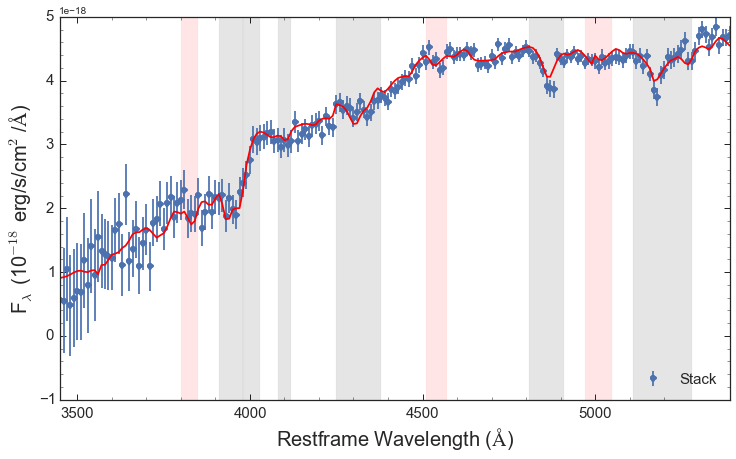

spec_stacks_jan24/n34694_stack.npy


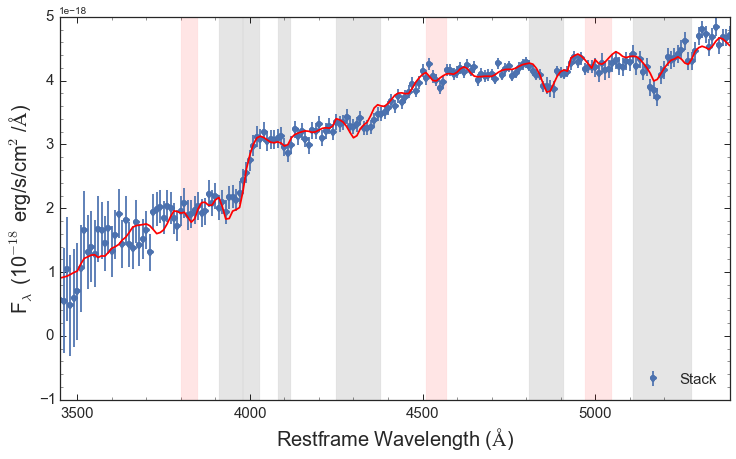

spec_stacks_jan24/s39012_stack.npy


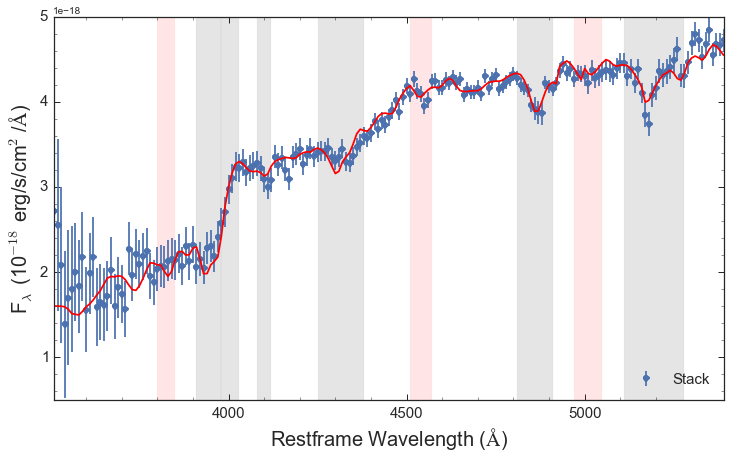

spec_stacks_jan24/s39170_stack.npy


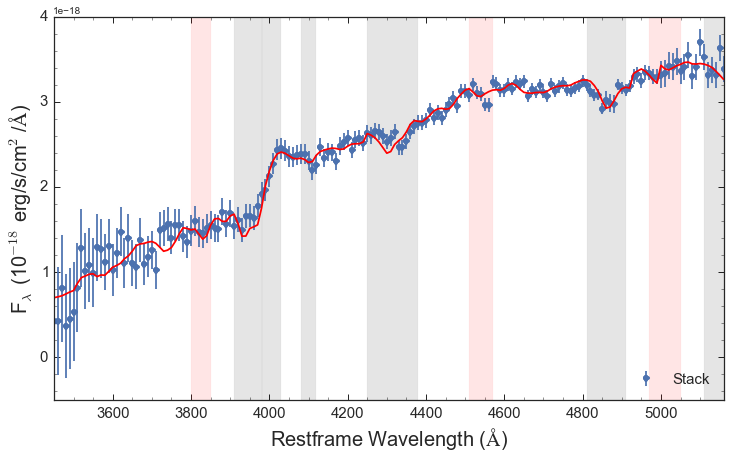

spec_stacks_jan24/s40597_stack.npy


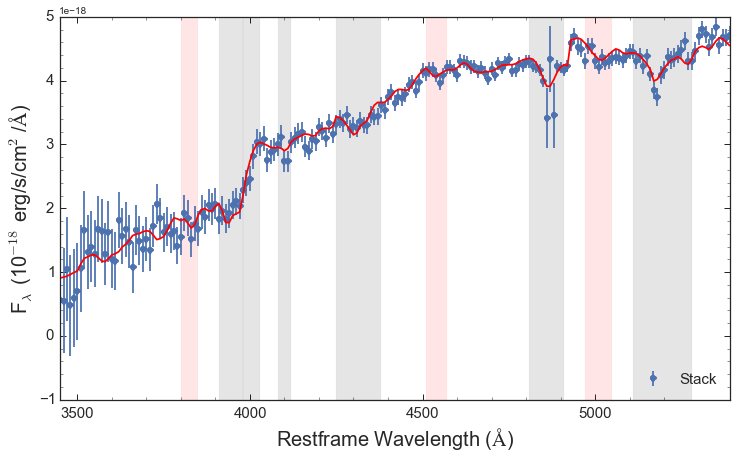

spec_stacks_jan24/s48631_stack.npy


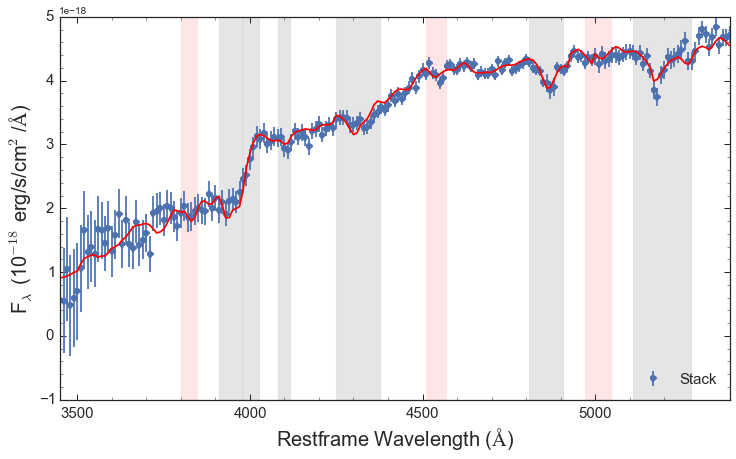

In [11]:
%matplotlib inline

for i in range(len(IDmH)):
    IDx=[]
    for ii in range(len(IDmH)):
        if IDmH[ii] != IDmH[i]:
            IDx.append(IDmH[ii])
            
    print speclist[IDmH][i]
    wv,fl,er=Stack_spec_normwmean_rfv(speclist[IDx],rshift[IDx],rfv[IDx],np.arange(3450,5400,10))
    mlist=Make_model_list(ids[IDx], 0.019, 2.1, 0, rshift[IDx])
    mwv,mfl=Stack_model_normwmean_rfv(speclist[IDx],mlist,rshift[IDx],rfv[IDx],np.arange(3450,5400,10))
    
    plt.figure(figsize=[12,8])
    plt.errorbar(wv,fl,er,fmt='o',label='Stack')
    plt.plot(mwv,mfl,'r')
    plt.axvspan(3800, 3850, color='r', alpha=.1)
    plt.axvspan(3910, 3980, color='k', alpha=.1)
    plt.axvspan(3980, 4030, color='k', alpha=.1)
    plt.axvspan(4080, 4120, color='k', alpha=.1)
    plt.axvspan(4250, 4380, color='k', alpha=.1)
    plt.axvspan(4510, 4570, color='r', alpha=.1)
    plt.axvspan(4810, 4910, color='k', alpha=.1)
    plt.axvspan(4970, 5050, color='r', alpha=.1)
    plt.axvspan(5110, 5280, color='k', alpha=.1)
    plt.xlim(min(wv),max(wv))
    plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\AA$)',size=20)
    plt.xlabel('Restframe Wavelength ($\AA$)',size=20)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.gcf().subplots_adjust(bottom=0.235)
    plt.legend(loc=4,fontsize=15)
    plt.minorticks_on()
    plt.show()
    plt.close()

8.95


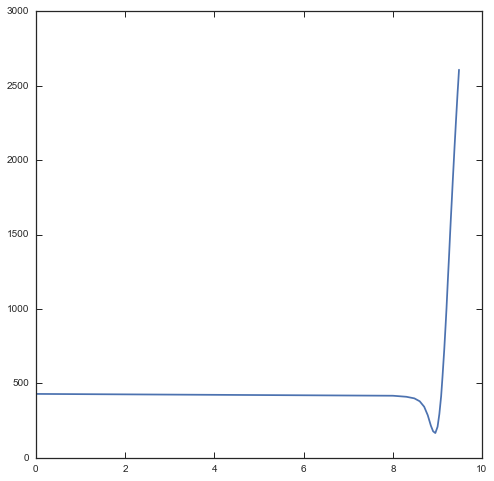

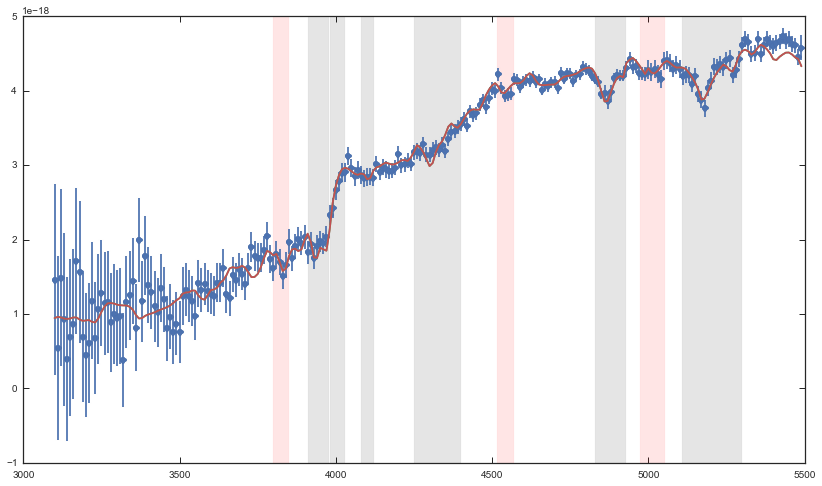

In [17]:
%matplotlib inline

wv2,fl2,er2=Stack_spec_normwmean_rfv(speclist[IDc],rshift[IDc],rfv[IDc],np.arange(3100,5500,10))
mwv1,mfl1=Stack_model_normwmean_rfv(speclist[IDc],mlist,rshift[IDc],rfv[IDc],np.arange(3100,5500,10))

def Highest_likelihood_model_rfv(galaxy,speclist,rshift,RF_v,bfmetal,bfage,tau,wv_range):
    wv,fl,er=Stack_spec_normwmean_rfv(speclist,rshift,RF_v,wv_range)

    chi=[]
    for i in range(len(tau)):
        mlist=Make_model_list(galaxy, bfmetal,  bfage, tau ,rshift)
        mwv,mfl=Stack_model_normwmean_rfv(speclist,mlist,rshift,RF_v,wv_range)
        chi.append(Identify_stack(fl,er,mfl))

    return bfmetal, bfage, tau[np.argmin(chi)]

plt.figure(figsize=[8,8])
plt.plot(tau,chi)
plt.show()
plt.close()

mlist=Make_model_list(ids[IDc], 0.019,  4.6, 8.95 ,rshift[IDc])

mwv1,mfl1=Stack_model_normwmean_rfv(speclist[IDc],mlist,rshift[IDc],rfv[IDc],np.arange(3100,5500,10))

C0=Scale_model(fl2,er2,mfl1)


plt.figure(figsize=[14,8])
plt.errorbar(wv2,fl2,er2,fmt='o')
# plt.plot(wv_range,stack)
plt.plot(mwv1,mfl1)
plt.plot(mwv1,C0*mfl1)
# plt.plot(mw,mf)
plt.axvspan(3800, 3850, color='r', alpha=.1)
plt.axvspan(3910, 3979, color='k', alpha=.1)
plt.axvspan(3981, 4030, color='k', alpha=.1)
plt.axvspan(4082, 4122, color='k', alpha=.1)
plt.axvspan(4250, 4400, color='k', alpha=.1)
plt.axvspan(4515, 4570, color='r', alpha=.1)
plt.axvspan(4830, 4930, color='k', alpha=.1)
plt.axvspan(4975, 5055, color='r', alpha=.1)
plt.axvspan(5109, 5300, color='k', alpha=.1)
plt.show()
plt.close()

Best fit model is 4.6 Gyr and 0.019 Z
[0.019000000000000003, 4.5999999999999988, 8.95]

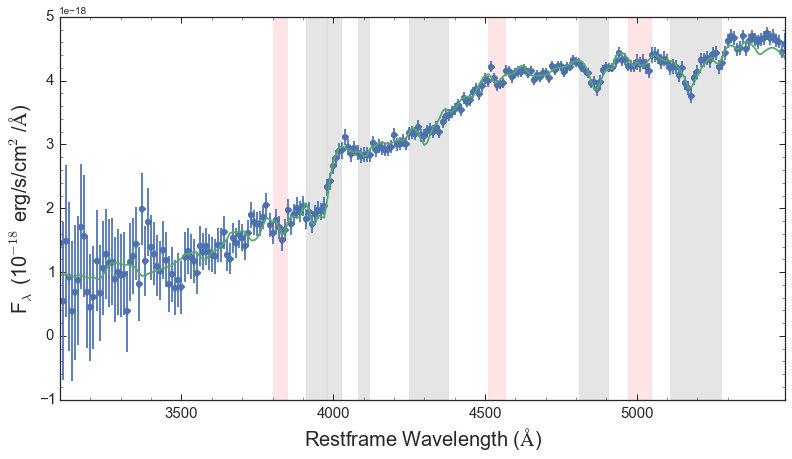

Best fit model is 2.6 Gyr and 0.012 Z
[0.012, 2.5999999999999996, 8.0]

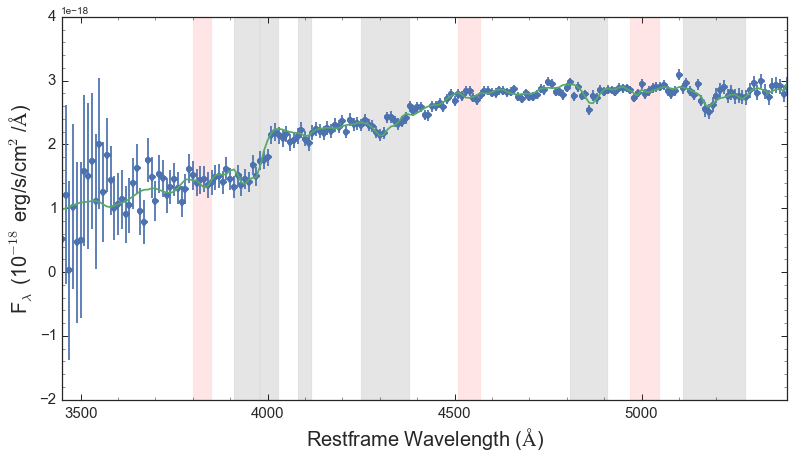

Best fit model is 4.4 Gyr and 0.019 Z
[0.019000000000000003, 4.3999999999999986, 8.95]

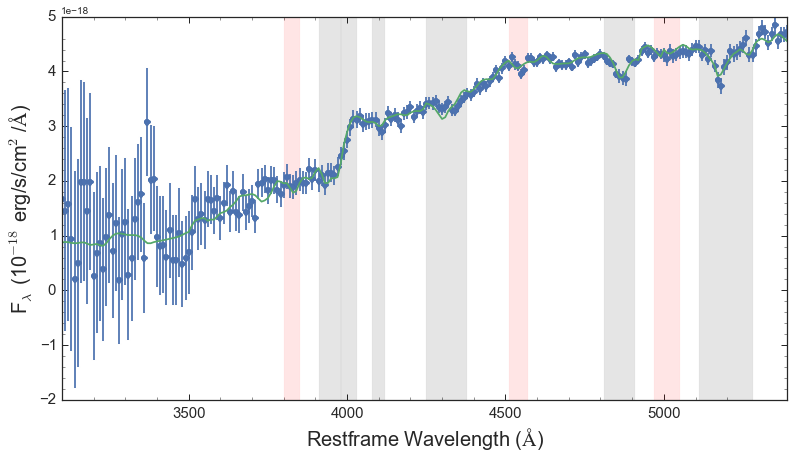

Best fit model is 4.6 Gyr and 0.007 Z
[0.0070000000000000001, 4.5999999999999988, 8.3]

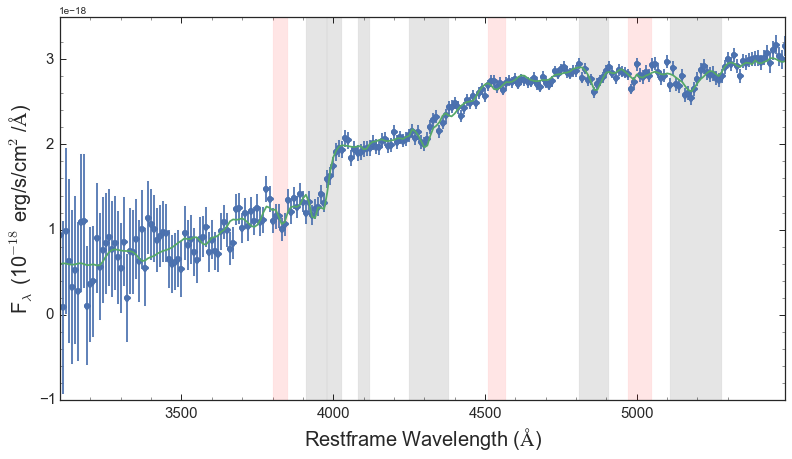

In [5]:
%matplotlib inline

wv,fl,er=Stack_spec_normwmean_rfv(speclist[IDc],rshift[IDc],rfv[IDc],np.arange(3100,5500,10))
Pr,bfa,bfm=Analyze_Stack_avgage('chidat/com_mar26_rfv_fit_chidata.fits',np.array(tau),metal,age)
bestm,besta,bestt=Highest_likelihood_model_rfv(ids[IDc],speclist[IDc],rshift[IDc],rfv[IDc],bfm,bfa,tau,np.arange(3100,5500,10))
print [bestm,besta,bestt]
mlist=Make_model_list(ids[IDc],bestm,besta,bestt,rshift[IDc])
mwv,mfl=Stack_model_normwmean_rfv(speclist[IDc],mlist,rshift[IDc],rfv[IDc],np.arange(3100,5500,10))

plt.figure(figsize=[13,8])
plt.errorbar(wv,fl,er,fmt='o')
plt.plot(mwv,mfl)
plt.axvspan(3800, 3850, color='r', alpha=.1)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(3980, 4030, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4510, 4570, color='r', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(4970, 5050, color='r', alpha=.1)
plt.axvspan(5110, 5280, color='k', alpha=.1)
plt.xlim(min(wv),max(wv))
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\AA$)',size=20)
plt.xlabel('Restframe Wavelength ($\AA$)',size=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gcf().subplots_adjust(bottom=0.235)
plt.minorticks_on()
plt.show()
plt.close()

wv,fl,er=Stack_spec_normwmean_rfv(speclist[IDd],rshift[IDd],rfv[IDd],np.arange(3450,5400,10))
Pr,bfa,bfm=Analyze_Stack_avgage('chidat/ext_mar26_rfv_fit_chidata.fits',np.array(tau),metal,age)
bestm,besta,bestt=Highest_likelihood_model_rfv(ids[IDd],speclist[IDd],rshift[IDd],rfv[IDd],bfm,bfa,tau,np.arange(3450,5400,10))
print [bestm,besta,bestt]
mlist=Make_model_list(ids[IDd],bestm,besta,bestt,rshift[IDd])
mwv,mfl=Stack_model_normwmean_rfv(speclist[IDd],mlist,rshift[IDd],rfv[IDd],np.arange(3450,5400,10))

plt.figure(figsize=[13,8])
plt.errorbar(wv,fl,er,fmt='o')
plt.plot(mwv,mfl)
plt.axvspan(3800, 3850, color='r', alpha=.1)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(3980, 4030, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4510, 4570, color='r', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(4970, 5050, color='r', alpha=.1)
plt.axvspan(5110, 5280, color='k', alpha=.1)
plt.xlim(min(wv),max(wv))
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\AA$)',size=20)
plt.xlabel('Restframe Wavelength ($\AA$)',size=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gcf().subplots_adjust(bottom=0.235)
plt.minorticks_on()
plt.show()
plt.close()

wv,fl,er=Stack_spec_normwmean_rfv(speclist[IDmH],rshift[IDmH],rfv[IDmH],np.arange(3100,5400,10))
Pr,bfa,bfm=Analyze_Stack_avgage('chidat/gt10.93_mar26_rfv_fit_chidata.fits',np.array(tau),metal,age)
bestm,besta,bestt=Highest_likelihood_model_rfv(ids[IDmH],speclist[IDmH],rshift[IDmH],rfv[IDmH],bfm,bfa,tau,np.arange(3100,5400,10))
print [bestm,besta,bestt]
mlist=Make_model_list(ids[IDmH],bestm,besta,bestt,rshift[IDmH])
mwv,mfl=Stack_model_normwmean_rfv(speclist[IDmH],mlist,rshift[IDmH],rfv[IDmH],np.arange(3100,5400,10))

plt.figure(figsize=[13,8])
plt.errorbar(wv,fl,er,fmt='o')
plt.plot(mwv,mfl)
plt.axvspan(3800, 3850, color='r', alpha=.1)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(3980, 4030, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4510, 4570, color='r', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(4970, 5050, color='r', alpha=.1)
plt.axvspan(5110, 5280, color='k', alpha=.1)
plt.xlim(min(wv),max(wv))
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\AA$)',size=20)
plt.xlabel('Restframe Wavelength ($\AA$)',size=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gcf().subplots_adjust(bottom=0.235)
plt.minorticks_on()
plt.show()
plt.close()

wv,fl,er=Stack_spec_normwmean_rfv(speclist[IDmL],rshift[IDmL],rfv[IDmL],np.arange(3100,5500,10))
Pr,bfa,bfm=Analyze_Stack_avgage('chidat/lt10.93_mar26_rfv_fit_chidata.fits',np.array(tau),metal,age)
bestm,besta,bestt=Highest_likelihood_model_rfv(ids[IDmL],speclist[IDmL],rshift[IDmL],rfv[IDmL],bfm,bfa,tau,np.arange(3100,5500,10))
print [bestm,besta,bestt]
mlist=Make_model_list(ids[IDmL],bestm,besta,bestt,rshift[IDmL])
mwv,mfl=Stack_model_normwmean_rfv(speclist[IDmL],mlist,rshift[IDmL],rfv[IDmL],np.arange(3100,5500,10))

plt.figure(figsize=[13,8])
plt.errorbar(wv,fl,er,fmt='o')
plt.plot(mwv,mfl)
plt.axvspan(3800, 3850, color='r', alpha=.1)
plt.axvspan(3910, 3980, color='k', alpha=.1)
plt.axvspan(3980, 4030, color='k', alpha=.1)
plt.axvspan(4080, 4120, color='k', alpha=.1)
plt.axvspan(4250, 4380, color='k', alpha=.1)
plt.axvspan(4510, 4570, color='r', alpha=.1)
plt.axvspan(4810, 4910, color='k', alpha=.1)
plt.axvspan(4970, 5050, color='r', alpha=.1)
plt.axvspan(5110, 5280, color='k', alpha=.1)
plt.xlim(min(wv),max(wv))
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\AA$)',size=20)
plt.xlabel('Restframe Wavelength ($\AA$)',size=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gcf().subplots_adjust(bottom=0.235)
plt.minorticks_on()
plt.show()
plt.close()